Saving test.csv to test.csv
Saving train.csv to train.csv
Train shape: (891, 12)
Test shape: (418, 11)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7482517482517482


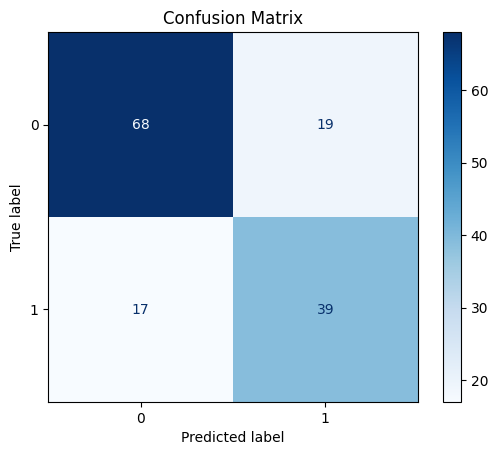

In [ ]:
from re import X
import pandas as pd          # For data tables
import numpy as np           # For numbers and arrays
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LogisticRegression    # Our model
from sklearn.metrics import accuracy_score             # To evaluate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()


train_df = pd.read_csv("train.csv") # the command to access the data
test_df = pd.read_csv("test.csv") # same as above

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
#train_df.head()        # First 5 rows, these commands let's me gather and access
#train_df.info()        # Data types and missing values, the info from these dataset
#train_df.describe()    # Summary statistics
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']] # categoriesing data
train_df = train_df.dropna() # this command removes missing rows that have no data

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}) # this tells our model that male represents 0 etc

# now split our data into training and testing

X = train_df[['Pclass', 'Pclass', 'Sex', 'Age', 'Fare']] # features that correlate to survival
y = train_df[['Survived']] # target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)



# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

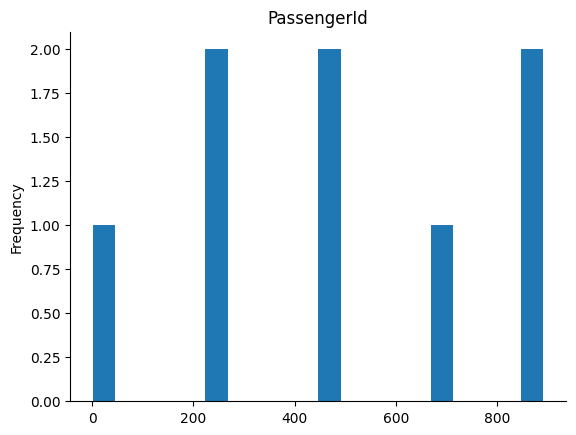

In [ ]:
from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)